<a href="https://colab.research.google.com/github/martha-irungu/Week8_Core_IP/blob/master/Week8_Core_IP__Martha_Irungu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

a) Specifying the question

The objective of this study is to use the healthcare dataset that Nairobi Hospital collected to accomplish the following:  

i)Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

ii)Build the following models using the dataset to make the prediction

*   Random Forests
*   Ada boosted trees
*   Support vector machine

iii)Compare the performance of the models and state your conclusion


**b)Defining the Metrics for success**

To meet the objective of the study we will create the above mentioned models and assess suitability of each of the tested models on their appropriateness to solve the given problem. 

We will subject the evaluation to the assumptions of each model, the features that important to the model and compare performance based on metrics such as RMSE, MSE, accuracy scores and make our conlusion


**c) Understanding the context**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.This a health care dataset.

Hypothyroidism is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.The thyroid is a small, butterfly-shaped gland that sits at the front of your neck. It releases hormones to help your body regulate and use energy.

The most common signs and symptoms of hypothyroidism include:fatigue, depression, constipation,feeling cold,dry skin,weight gain,muscle weakness,decreased sweating,slowed heart rate,elevated blood cholesterol,pain and stiffness in,your joints,dry, thinning hair just to mention a few.

Worldwide, the most common cause of hypothyroidism is inadequate iodine intake. In countries where iodine consumption is adequate, the most common cause is an autoimmune condition called Hashimoto’s thyroiditis, whereby the body’s antibodies attack the thyroid gland and cause it to produce less thyroid hormone. Other causes include thyroid surgery, radioactive iodine treatment and injury to the hypothalamus.In the kenyan context, this is a condition that many can live with without noticing as health care services are nit availble to all. That is why Nairobi Hopital took this initiative to understand this condition.

Similar studies as per this link have been done by Kenyatta Hospital and Agakhan University Hospital, this condition is described to be the second commonest endocrine disease, observed in Kenyatta Hosptital second to Diabetes. 

http://erepository.uonbi.ac.ke/bitstream/handle/11295/25104/DR._KENNETH_K._SIGILAI_MBCHB_NAIROBI.pdf?sequence=4&isAllowed=y

https://link.springer.com/article/10.1186/s12902-016-0107-9

**d) Recording the experimental design**

The following steps were implemented

1.) Business Understanding, this keeps you grounded to the main question and gives light throughout all your analysis.

2.) Reading the data.

3.) Data Exploration and cleaning to prepare the data for modelling

4.) EDA, here is where I did my analysis and visualization of the data.

5.) Checking for multicollinearity.

6.) Model Development.

**e)Data Relevance**

The data provided for this study consists of columns with factors likely to influence hypothyroidism. The study was conducted by a Nairobi hospital which is a reputable health care facility in Kenya.This data is relevant for the study.

# 2. Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#3. Reading and checking the data

In [4]:
#Previewing the first 5 columns of the dataset
df= pd.read_csv('hypothyroid.csv')

df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
#Previewing the last 5 columns of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#Checking the shape of our dataset
df.shape

(3163, 26)

We have 3,163 records and 26 columns

In [ ]:
#Checking the columns in our dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

*Below is a brief description of the columns in our dataset **bold text**


* Age- age of the patient
* Sex- gender of the patient; male or female
* on_thyroxine: A hormone that is made by the thyroid gland  and is one of the most important thyroid hormones. We have True or False values in iur dataset. 

* query_on_thyroxine-A query on this hormone. We have True or False values.
* on_antithyroid_medication: Antithyroid drugs are most often used to treat an overactive thyroid (hyperthyroidism) caused by Graves' disease. These drugs block the formation of thyroid hormone by the thyroid gland. We have True or False values.
* thyroid_surgery: This is an operation that involves the surgical removal of all or part of the thyroid gland. We have True or False values. 

* TSH: levels typically fall between 0.4 and 4.0 milliunits per liter (mU/L), according to the American Thyroid Association. If your level is higher than this, chances are you have an underactive thyroid. We have numeric values
* TSH Measured: If this test is done on a patient.We have yes and no values.
* Pregnant: We have true or false values. This predisposes patient to the condition 
* Goitre: is an abnormal enlargement of your thyroid gland. We have True and False values..
* T4: The test, called a thyroid function test, looks at levels of thyroid-stimulating hormone (TSH) and thyroxine (T4) in the blood.

* FTI: FRTUP Free Thyroxine Index (FTI), Serum
* T4U: This is thyroxine utilization rate.

* Tumor: an abnormal benign or malignant new growth of tissue. We have True and False values.

* Lithium: It is primarily used to treat bipolar disorder and treat major depressive disorder that does not improve following the use of antidepressants. We have True and False values..
* TT4: A thyroxine test helps diagnose disorders of the thyroid. Too much or too little T4 can indicate thyroid disease


* TBG: The TBG blood test measures the level of a protein that moves thyroid hormone throughout your body. This protein is called thyroxine binding globulin (TBG). We have numeric values.

* TBG Measured: If the test has been conducted. We have yes and no values.













In [ ]:
#Checking the datatypes
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All the columns are in object datatype, we will covert each approporiately to ease analysis

# 4. Data cleaning and exploration

In [ ]:
#get to know unique values in each column

data_columns = df.columns.to_list()

for column in data_columns:
    print("\n")
    print("Column Name:", column)
    print(df[column].unique())



Column Name: status
['hypothyroid' 'negative']


Column Name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column Name: sex
['M' 'F' '?']


Column Name: on_thyroxine
['f' 't']


Column Name: query_on_thyroxine
['f' 't']


Column Name: on_antithyroid_medication
['f' 't']


Column Name: thyroid_surgery
['f' 't']


Column Name: query_hypothyroid
['f' 't']


Column Name: query_hyperthyroid
['f' 't']


Column Name: pregnant
['f' 't']


Column Name: sick
['f' 't']


Column Name: tumor
['f' 't']


Column Name: lithium
['f' 't']


Column Name: goitre
['f' 't']


Column Name

We observe that the columns in the dataset are as classified below:

i)The following columns are in False/True values, we will change the data type from object to boolen

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

ii)The following columns have values categorised into yes and no and for sex is male and female. We will convert the data type to category

TSH_measured

T3_measured

TT4_measured

T4U_measured

FTI_measured

TBG_measured

Sex

Status


iii) The following columns have data that is continous in nature, we will change the data type to float

Age

TSH

T3

TT4

T4U 

FTI

TBG

We also note that some columns such as age, Sex have '?' as values, we will investigate this to establish how this affects the variables in aour dataset




In [ ]:
#Checking for null values
df.isna().sum()


status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

It is clear that our dataset had values with '?' when we check missing values using the above funtion it shows no missing values

In [ ]:
# To solve the above challenge, we will replace '?' values with NaN

df.replace("?", "NaN")


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN


In [ ]:
#Check the missing values
df.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

We observe that 8 out of 26 columns have missing values.TBG column has the higest number of missing values; 2,903,followed by T3 with 695.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


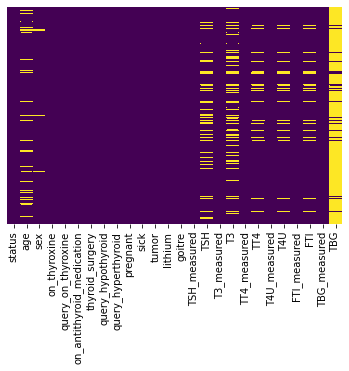

In [ ]:
import seaborn as sns
#Visualizing null values 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We obdserve that TBG column has the highest number of missing values. As muchit is easier to drop it, we will fill the null values with the mean as this(TBG) is the blood test that measures the level of a protein that moves thyroid hormone throughout your body. This data will add value to to our study.

In [ ]:
#Converting the Age, TSH, T3, TT4, T4U, FTI, TBG columns in our dataset whose values 
#are float/numeric to the right data type so that we can fill the null values

df.age=pd.to_numeric(df.age, errors='coerce')
df.TSH=pd.to_numeric(df.TSH, errors='coerce')
df.T3=pd.to_numeric(df.T3, errors='coerce')
df.TT4=pd.to_numeric(df.TT4, errors='coerce')
df.T4U=pd.to_numeric(df.T4U, errors='coerce')
df.FTI=pd.to_numeric(df.FTI, errors='coerce')
df.TBG=pd.to_numeric(df.TBG, errors='coerce')
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [ ]:
#Changing the data types to the right format
#Changing the TSH_measured, T3_measured, TT4_measured, T4U_measured,FTI_measured, TBG_measured,Sex,
#status columns from object to category datatype

df["TBG_measured"]= df["TBG_measured"].astype('category')

df["sex"]= df["sex"].astype('category')

df["T3_measured"]= df["T3_measured"].astype('category')

df["TT4_measured"]= df["TT4_measured"].astype('category')

df["T4U_measured"]= df["T4U_measured"].astype('category')

df["FTI_measured"]= df["FTI_measured"].astype('category')

df["TBG_measured"]= df["TBG_measured"].astype('category')

df["status"]= df["status"].astype('category')

df.dtypes 

status                       category
age                           float64
sex                          category
on_thyroxine                   object
query_on_thyroxine             object
on_antithyroid_medication      object
thyroid_surgery                object
query_hypothyroid              object
query_hyperthyroid             object
pregnant                       object
sick                           object
tumor                          object
lithium                        object
goitre                         object
TSH_measured                   object
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
#Changing on_thyroxine, query_on_thyroxine, on_antithyroid_medicationthyroid_surgery, query_hypothyroid
#query_hyperthyroid, pregnant, sick, tumor, lithium, goitre columns with 't' for True and 'f' for False. 
#This is to enable us convert the data type from object to Boolean

#changing on_thyroxine column
df['on_thyroxine'] = df['on_thyroxine'].replace('t', True)
df['on_thyroxine'] = df['on_thyroxine'].replace('f', False)

#changing on_thyroxine column
df['query_on_thyroxine'] = df['query_on_thyroxine'].replace('t', True)
df['query_on_thyroxine'] = df['query_on_thyroxine'].replace('f', False)

#changing on_antithyroid_medication column
df['on_antithyroid_medication'] = df['on_antithyroid_medication'].replace('t', True)
df['on_antithyroid_medication'] = df['on_antithyroid_medication'].replace('f', False)

#changing thyroid_surgery column
df['thyroid_surgery'] = df['thyroid_surgery'].replace('t', True)
df['thyroid_surgery'] = df['thyroid_surgery'].replace('f', False)

#changing query_hypothyroid column
df['query_hypothyroid'] = df['query_hypothyroid'].replace('t', True)
df['query_hypothyroid'] = df['query_hypothyroid'].replace('f', False)

#changing query_hyperthyroid column
df['query_hyperthyroid'] = df['query_hyperthyroid'].replace('t', True)
df['query_hyperthyroid'] = df['query_hyperthyroid'].replace('f', False)

#changing pregnant column
df['pregnant'] = df['pregnant'].replace('t', True)
df['pregnant'] = df['pregnant'].replace('f', False)

#changing sick column
df['sick'] = df['sick'].replace('t', True)
df['sick'] = df['sick'].replace('f', False)

#changing tumor column
df['tumor'] = df['tumor'].replace('t', True)
df['tumor'] = df['tumor'].replace('f', False)

#changing lithium column
df['lithium'] = df['lithium'].replace('t', True)
df['lithium'] = df['lithium'].replace('f', False)

#changing goitre column
df['goitre'] = df['goitre'].replace('t', True)
df['goitre'] = df['goitre'].replace('f', False)

#Checking if this has been implemented
df.head(3)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN


In [ ]:
#Checking the data types to confirm if the changes ahve been effected
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                     bool
query_on_thyroxine               bool
on_antithyroid_medication        bool
thyroid_surgery                  bool
query_hypothyroid                bool
query_hyperthyroid               bool
pregnant                         bool
sick                             bool
tumor                            bool
lithium                          bool
goitre                           bool
TSH_measured                   object
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

**Dealing with missing values: **

**Dropping them**

This is the fastest and easiest step to handle missing values. However this method reduces the quality of our model as it reduces sample size because it works by deleting all other observations where any of the variable is missing. 

**Filling them with test statistics**
This is where the missing values are replaced with a test statistic like mean, median or mode of the particular feature the missing value belongs to. One can also specify a forward-fill or back-fill to propagate the next values backward or previous value forward.

We will replace the missing values of the following columns whose values are float/numeric with mean of those specific columns: Age,TSH,T3,TT4,T4U,FTI and TBG

We will replace the missing values of sex with mode-the number that appears more frequently in the dataset, since this column is categorical(male or female)

In [ ]:
#Now that our columns have the right datatypes we can fill null values
# We will replace the missing values of the following columns whose values are float/numeric with mean of those specific columns: Age,TSH,T3,TT4,T4U,FTI and TBG

# We will replace the missing values of sex with mode-the number that appears more frequently in the dataset, since this column is categorical(male or female)

mean_value=df['age'].mean()
df['age']=df['age'].fillna(mean_value)


mean_value=df['TSH'].mean()
df['TSH']=df['TSH'].fillna(mean_value)


mean_value=df['T3'].mean()
df['T3']=df['T3'].fillna(mean_value)

mean_value=df['TT4'].mean()
df['TT4']=df['TT4'].fillna(mean_value)

mean_value=df['T4U'].mean()
df['T4U']=df['T4U'].fillna(mean_value)

mean_value=df['FTI'].mean()
df['FTI']=df['FTI'].fillna(mean_value)

mean_value=df['TBG'].mean()
df['TBG']=df['TBG'].fillna(mean_value)

# We will replace null values for sex using mode

mode_value=df['sex'].mode()
df['sex']=df['sex'].fillna(mode_value)

df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.283077
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,31.283077
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,31.283077
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,31.283077
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,31.283077



This has replaced all NaN values with the mean of the non null values and mode for the sex column


* Checking and dealing with outliers

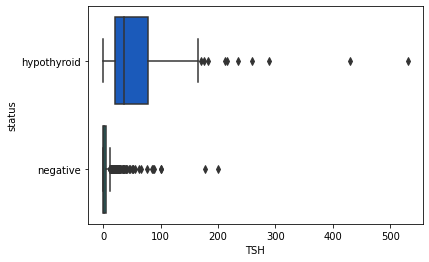

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='TSH',y ='status',data=df,palette ='winter')

TSH has outliers in individuals with eaither of the status

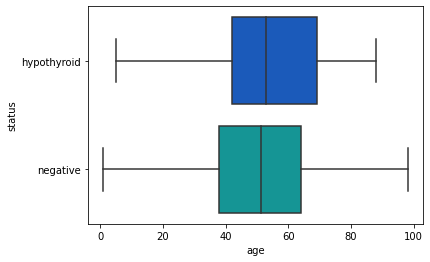

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='age',y ='status',data=df,palette ='winter')

Age has no outliers

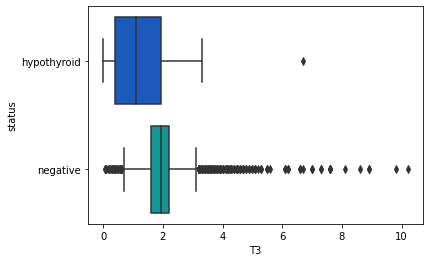

In [ ]:
 #Visualizing numerical variables to check for outliers  
sns.boxplot(x='T3',y ='status',data=df,palette ='winter')

Its evident that there are many outliers in T3 especially when the hypothyroid status is negative

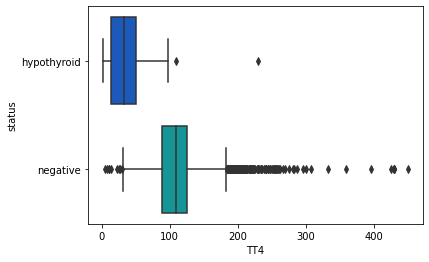

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='TT4',y ='status',data=df,palette ='winter')

Its evident that there are many outliers in TT4 especially when the hypothyroid status is negative

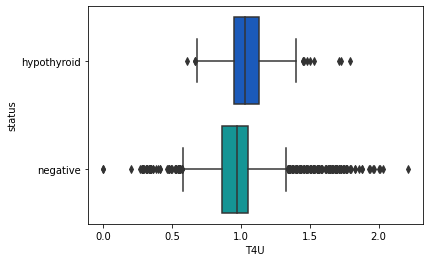

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='T4U',y ='status',data=df,palette ='winter')

Its evident that T4U has outliers

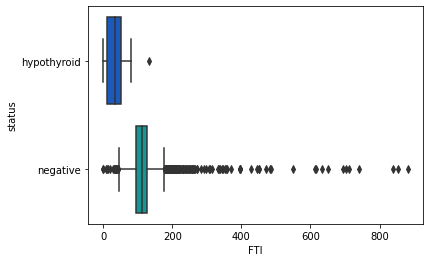

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='FTI',y ='status',data=df,palette ='winter')

FTI has outliers, they are more conspicous when the status is negative

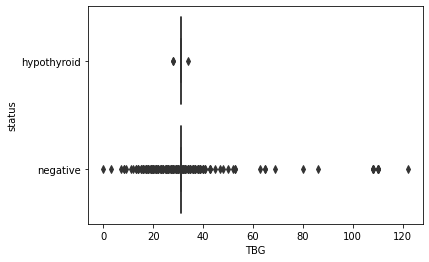

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='TBG',y ='status',data=df,palette ='winter')

TBG has outliers, its the column that had most missing values, we filled the null values with the mean, this could explain the observation

We opt not to remove the outliers as most of these are tests that are done and each has a threshold where if an individual have certain limits, then it predisposes you to hypothyroid. Where outliers would be more when the status is negative, this could be explained by the fact that levels of specific test for an individual who is negative would differ majorly with those who have the condition

# 5. Univariate and Bivariate analysis

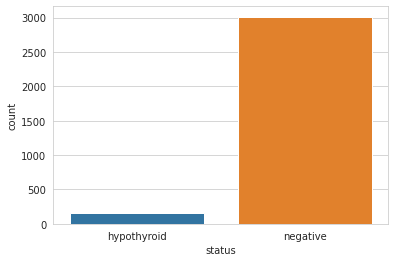

In [14]:
# Plotting the count of those with or without thyroid
#Plotting count plots
sns.set_style('whitegrid')
sns.countplot (x='status', data=df)


It is evident that we have more individuals who are negative and very few with hypothyroid condition.The data is therefore imbalanced.

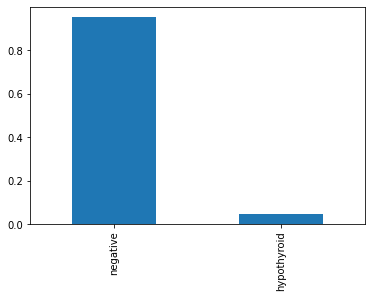

In [ ]:
# Plotting percentage of respondents based on their status

(df['status'].value_counts()/len(df)).plot.bar()


We observe that we have more than 80% who are negative, while a very small percentage have hypothyroid condition. This means we have imbalanced data, no equal representation for the 2 classes.

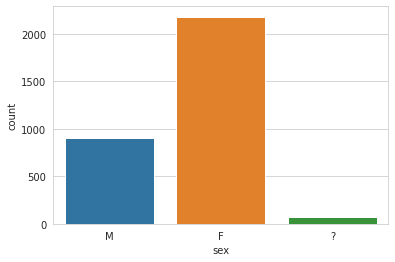

In [12]:
#Count plot to assess gender column
sns.set_style('whitegrid')
sns.countplot (x='sex', data=df)

We observe that Females are more than males and few entries with '?'. We will deal with the missing values

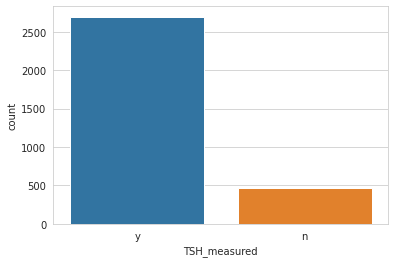

In [15]:
#Checking individuals that have taken TSH test
sns.set_style('whitegrid')
sns.countplot (x='TSH_measured', data=df)

We note that there are more individuals who have taken this test.

In [ ]:
#Calculating range between minimum and maximum age 
df_max = df["age"].max()
df_min = df["age"].min()

# Calculating the range
df_max - df_min


97.0


The range is 97, this is quite high

In [ ]:
#Checking skewness
df["age"].skew() 


-0.17527599132644203

Age is negatively skewed

In [ ]:
#Checking summary statistics for respondent's age
df["age"].describe()

count    3163.000000
mean       51.154214
std        17.881969
min         1.000000
25%        38.000000
50%        51.154214
75%        64.000000
max        98.000000
Name: age, dtype: float64

We have 51.1 as the mean age and a standard deviation of 17.8, indicating high variance.

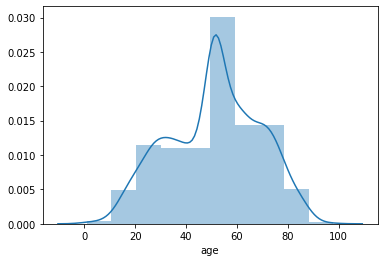

In [ ]:
# Ditribution plot for age
sns.distplot(df['age'], bins=10) 

We observe that distribution of age is negativley skewed, mena age being 51 years.

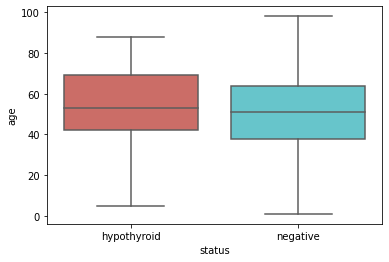

In [ ]:
sns.boxplot(x='status', y='age', data=df, palette='hls')

We observe that individuals with hypothyroid are slightly older that those who are negative.

# 6. Multivariate analysis

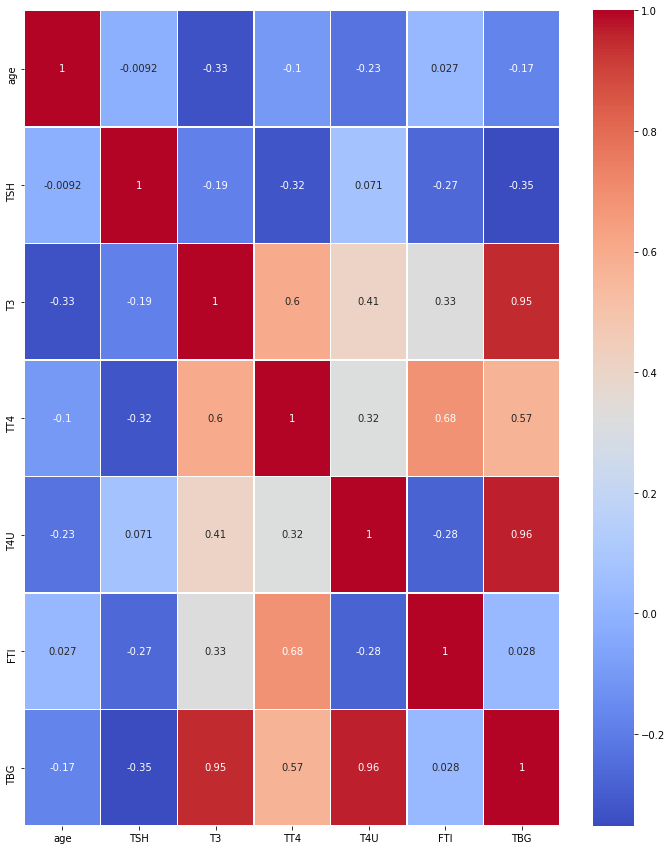

In [ ]:

# Correlation matrix to check relationship of different variables

df_corr = df.corr()
plt.figure(figsize=(12,15))

# We then plot our heatmap visualistion
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');

We observe that TBG has a strong correlation OF 0.96 and 0.95 respectively with T4U and T3

Checking Multicollinearity

This is to help us asssess if there is multicollinearity expressed among our independent variables.

In [ ]:
# get the correlation of our variables
corr = df.corr()

pd.DataFrame(np.linalg.inv(df.corr().values), index = corr.index, columns=corr.columns)

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG
age,1.119804,0.020304,0.027710,0.039558,0.012316,-0.045754,0.044014,0.098682,-0.036206,0.058873,0.018677,0.005634,0.023903,0.285473,-0.111492,0.102311,0.004939,0.037898
on_thyroxine,0.020304,1.101041,0.015181,0.003552,-0.034692,-0.061841,0.129190,0.025337,0.073067,0.019478,0.012847,0.020930,-0.078419,0.136529,-0.472800,0.057298,0.144340,0.015950
query_on_thyroxine,0.027710,0.015181,1.007891,0.012111,-0.018068,0.017360,0.038250,0.009807,0.027485,-0.046754,0.002203,-0.007411,0.012657,0.003820,-0.021066,0.048427,0.029462,-0.000543
on_antithyroid_medication,0.039558,0.003552,0.012111,1.023932,0.011425,0.030444,-0.117884,0.015741,0.012647,0.016688,0.003806,0.032821,0.007327,-0.062856,0.056599,-0.011553,0.006871,0.013782
thyroid_surgery,0.012316,-0.034692,-0.018068,0.011425,1.006658,0.005949,-0.029020,0.020921,0.031175,0.023804,0.006216,0.025278,0.006462,0.011830,0.054085,-0.054817,-0.019981,0.018245
query_hypothyroid,-0.045754,-0.061841,0.017360,0.030444,0.005949,1.022837,0.005254,0.014044,0.056466,0.029480,-0.040922,0.022653,-0.059128,0.038776,-0.049390,-0.022370,0.059044,0.010157
query_hyperthyroid,0.044014,0.129190,0.038250,-0.117884,-0.029020,0.005254,1.080805,-0.032288,0.042814,0.037150,0.009019,-0.027894,-0.044533,-0.127795,-0.231775,0.099098,0.113720,0.006939
pregnant,0.098682,0.025337,0.009807,0.015741,0.020921,0.014044,-0.032288,1.154728,0.001276,0.008867,0.019492,-0.055960,0.025821,-0.032711,0.078851,-0.406070,-0.144591,-0.083611
sick,-0.036206,0.073067,0.027485,0.012647,0.031175,0.056466,0.042814,0.001276,1.024917,0.020626,0.001260,0.026583,0.009769,0.100799,-0.077601,0.028560,0.050947,-0.003233
tumor,0.058873,0.019478,-0.046754,0.016688,0.023804,0.029480,0.037150,0.008867,0.020626,1.012857,0.005303,0.026564,0.029169,-0.025485,0.036509,-0.027070,0.005438,0.004808


We Observe that VIF scores are below 5 this is within the range, there is no multicollinearity among our independent variables.

In [18]:
#Encoding labels and attributes so that it is easy to do the analysis

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)

y = np.where(df.status == 'hypothyroid', 1, 0)

y = df['status']


Perfoming LDA to determine whch factors most influence hypothyroid condition.

In [ ]:
# dividing dataset into feature set and corresponding labels
features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)

X = features 

y = np.where(df.status == 'hypothyroid', 1, 0)

# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# applying Principle Component Analyis
# importing pca
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

,0
TSH,4.053050e+00
T4U,1.596613e+00
FTI_measured_y,1.357124e+00
TBG_measured_y,1.110610e+00
FTI,8.117605e-01
query_hyperthyroid,3.783921e-01
TSH_measured_y,3.710583e-01
T4U_measured_n,3.137368e-01
age,2.704071e-01
thyroid_surgery,2.387276e-01


The top 3 features that influence the status of whether one has hypothyroid are 
TSH	4.053050e+00
T4U	1.596613e+00
FTI_measured_y	1.357124e+00

The 4 features from the bottom are;This means that they least influence the status

TSH_measured_n	-3.710583e-01
TBG_measured_n	-1.110610e+00
FTI_measured_n	-1.357124e+00
TT4	-3.058913e+00

# 7.Implementing the models

a)The baseline model

In [ ]:
#We will begin by building our baseline models, we will use decison tree and logistic classifier
# We will split the independent and dependent variables

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)
X =features

y = np.where(df.status == 'hypothyroid', 1, 0)

# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Intantiate our models

logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs')
decision_classifier = DecisionTreeClassifier()

# Use these classifiers to fit our data, X_train and y_train

logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score 

# Printing the accuracy score 

print(accuracy_score(logistic_y_prediction, y_test))
print(accuracy_score(decision_y_prediction, y_test))


#Printing the classification report, 

print('Logistic classifier:')
print(classification_report(y_test, logistic_y_prediction))

print('Decision Tree classifier:')
print(classification_report(y_test, decision_y_prediction))

0.9152970922882427
0.9013906447534766
Logistic classifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       749
           1       0.07      0.05      0.06        42

    accuracy                           0.92       791
   macro avg       0.51      0.51      0.51       791
weighted avg       0.90      0.92      0.91       791

Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       749
           1       0.05      0.05      0.05        42

    accuracy                           0.90       791
   macro avg       0.50      0.50      0.50       791
weighted avg       0.90      0.90      0.90       791



Since this is a classification problem, we will begin by building a baseline model. We have used Logistic classification and decision tree. This is to help us compare the performance of our models with the baseline model. We have used all the features and have not normalized or standadized our data.

Accuracy score for decison tree baseline model is 91% while that of logistic is 90%. We will compare this performance with other models.




b)RandomForestClassifier

Brief
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

  i) With all features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# We will split the independent and dependent variables

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)
features=X 

y = np.where(df.status == 'hypothyroid', 1, 0)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# The random_state variable is here to guarantee that we all see the same numbers.
#We will not apply the n_estimators, min_sample and maximum depth parameters.These will be 
#applied in the optimized model

classifier = RandomForestClassifier(random_state=42) #n_estimators = 100, , min_samples_split = 20, max_depth=5)
classifier = classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Print metric to assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[905   5]
 [  8  31]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.86      0.79      0.83        39

    accuracy                           0.99       949
   macro avg       0.93      0.89      0.91       949
weighted avg       0.99      0.99      0.99       949

Mean Absolute Error: 0.0136986301369863
Mean Squared Error: 0.0136986301369863
Root Mean Squared Error: 0.11704114719613055


When we applied all the features, Our model have an accuracy score of 99% and a good RMSE score of  0.11704,we did not set parameters, We will check for feature importance and set parameters, so as to compare pereformace with optimized parameters

In [ ]:
#Comparison of predicted outcome and actual
df.describe()

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.037935
std,0.198617,0.191139
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


ii ) Checking for feature Importance

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# Check each feature with its importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.04), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.22), ('TSH_measured', 0.0), ('TSH', 0.66), ('T3_measured', 0.0), ('T3', 0.07), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.0), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.66
Variable: goitre               Importance: 0.22
Variable: T3                   Importance: 0.07
Variable: query_on_thyroxine   Importance: 0.04
Variable: age                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable:

From the above outcome, we can observe that the top 5 most important features are:

Variable: TSH                  Importance: 0.66

Variable: goitre               Importance: 0.22

Variable: T3                   Importance: 0.07

Variable: query_on_thyroxine   Importance: 0.04

Variable: age                  Importance: 0.01

This is somewhat different with the results we got from LDA, TSH was the top influencer but the order of the other 4 is different.
The rest of the features are not important.

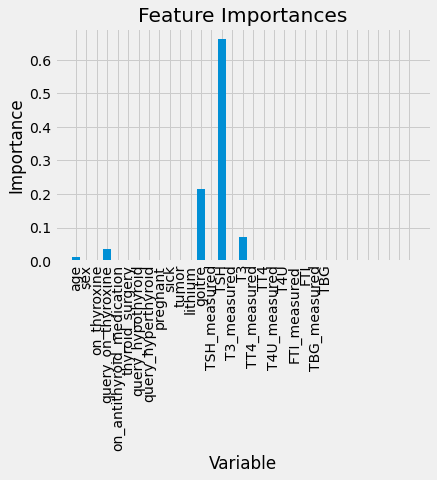

In [ ]:
#Plotting the feature importance
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances'); 

 iii) Parameter tuning

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action = 'ignore')

# Checking best parameters that we will apply to tune the model as we build a model with important features only

parameters = {'n_estimators': [5, 20, 40, 80, 150],
        'max_depth': [2, 4,5,6, 8, 10]
      }

#We will apply cross validation of 10 folds

kfold = KFold(n_splits = 10, shuffle=True)

# #We will use gridSerach method to search for best parameters and 5 kfolds to validate
classifier = RandomForestClassifier()
search = GridSearchCV(model, param_grid=parameters, scoring= 'f1', cv = kfold)

# Fit our model with our variables 
#
search.fit(X, y)

# Checking for the best parameters

print(f'Best parameters: {search.best_params_}')

Best parameters: {'max_depth': 8, 'n_estimators': 40}


The best parameters to apply is a max-depth of 8 and n_estimators of 40

 iv) Random Forest with important features only and best parameters

In [ ]:
 #We will split the independent and dependent variables

X = features[['TSH','goitre','T3','query_on_thyroxine','age']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# The random_state variable is here to guarantee that we all see the same numbers.
# We will apply min_samples_split of 20,  max_depth of 5 and 50 trees
classifier = RandomForestClassifier(n_estimators = 40,random_state=42, max_depth=8)
classifier = classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)

#Printing the accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Print metric to assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[896  14]
 [ 13  26]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       910
           1       0.65      0.67      0.66        39

    accuracy                           0.97       949
   macro avg       0.82      0.83      0.82       949
weighted avg       0.97      0.97      0.97       949

Mean Absolute Error: 0.02845100105374078
Mean Squared Error: 0.02845100105374078
Root Mean Squared Error: 0.16867424537771253


The performance of this model is lower incomparison with our earlier model that we applied all the features. The accuracy score is 97% compared to 99%, RMSE Score 0.1687 slightly higher than 0.11704 that we got in the first model. We applied 50 trees and maximum depth of 5.


The fact that it uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. This could explain the great performance.

c)AdaboostClassifier

AdaBoost is sensitive to noisy data and outliers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms.

i ) With all features

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# We will split the independent and dependent variables

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)
X =features

y = np.where(df.status == 'hypothyroid', 1, 0)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


# Create adaboost classifer object
adaboost = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer 
model = adaboost.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Printing the accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Print metric to assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.9852476290832455
[[896   8]
 [  6  39]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.83      0.87      0.85        45

    accuracy                           0.99       949
   macro avg       0.91      0.93      0.92       949
weighted avg       0.99      0.99      0.99       949

Mean Absolute Error: 0.014752370916754479
Mean Squared Error: 0.014752370916754479
Root Mean Squared Error: 0.1214593385325084


Based on this model, we have achieved an accuracy of 98.5% and an RMSE OF 0.121. We have trained the model based on all the features that the dataset has. We will check for feature importance, then we traing the model on features that emerge to compare performance with this one. 

ii) Checking feature importance

[0. 0. 0. ... 0. 0. 0.]


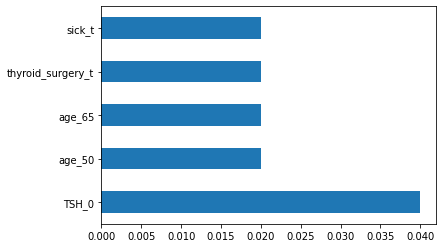

In [ ]:
#Checking feature importance
#use inbuilt class feature_importances of tree based classifiers
model = AdaBoostClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

We observe that based on this, top 3 features of importance that influence the condition we are predicting are TSH,age and thyroid surgery. We will determine the best parameters then we model using the 3 features and compare performance.

 iii) Parameter tuning

In [ ]:
# Checking best parameters that we will apply to tune the model as we build a model with important features only

parameters = {'n_estimators': [5, 20, 40, 80, 150],
        'learning_rate': [2, 4,5,6, 8, 10]
      }

#We will apply cross validation of 10 folds

kfold = KFold(n_splits = 10, shuffle=True)

# #We will use gridSerach method to search for best parameters and 5 kfolds to validate
classifier = AdaBoostClassifier()
search = GridSearchCV(model, param_grid=parameters, scoring= 'f1', cv = kfold)

# Fit our model with our variables 
#
search.fit(X, y)

# Checking for the best parameters

print(f'Best parameters: {search.best_params_}')

Best parameters: {'learning_rate': 2, 'n_estimators': 5}


We observe that the best parameters to apply is learning rate of 2 and n_estimators of 5

iv)AdaBoostClassifier with 3 features and best parameters

In [ ]:
# We will split the independent and dependent variables

X = features[['TSH', 'thyroid_surgery','age']]

y = np.where(df.status == 'hypothyroid', 1, 0)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


# Create adaboost classifer object
adaboost = AdaBoostClassifier(n_estimators=5,
                         learning_rate=2)
# Train Adaboost Classifer 
model = adaboost.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Printing the accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Print metric to assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.9736564805057956
[[887  14]
 [ 11  37]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       901
           1       0.73      0.77      0.75        48

    accuracy                           0.97       949
   macro avg       0.86      0.88      0.87       949
weighted avg       0.97      0.97      0.97       949

Mean Absolute Error: 0.026343519494204427
Mean Squared Error: 0.026343519494204427
Root Mean Squared Error: 0.1623068682902989


When we modelled using 3 features and best parameters, our model has achieved an accuracy score of 97.3 this is slightly lower that the perfomance of the first model where we applied all the features. The RMSE score achieved is also higher than our earlier model.

As much as AdaBoost is sensitive to noisy data and outliers, the model performed better when we applied all the features, yet some of our variable had outliers

d) SupportVectorMachine (SVM)

* Brief

Support vector machine ( SVM) is a supervised learning algorithm often used in classification. We will explore the following as we build our model:

* 	Kernel Function: This maps a lower dimension data to a higher dimension data. The function of a kernel is to take data as input and transform it into the required form. We have 4 types namely; Linear, non-linear, polynomial, radial basis function and sigmoid. 


*   Regularization: 

* C is the penalty parameter that represents misclassification or the error term. The misclassification or error term tells the SVM optimization how much error is bearable. A small value of C creates a small margin hyperplane and a larger value of C creates a large margin hyperplane. This is how we would optimize our model when your kernel is linear

* Gamma: This parameter is specific to the rbf kernel. Intuitively this is a measure of how far each data point's influence on the hyperplane's creation should be. a high value for gamma means that the influence remains close to the data point, which can lead to overfitting. A low value means that the influence goes far, but that can oversimplify a model. 




*Implementing SVM with only 2 features

i)Kernel-Linear

In [ ]:
#Seperating features and labels
X = df[['TSH','age']].values

y = np.where(df.status == 'hypothyroid', 1, 0)

#divide data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#We will standardize the data for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# #Train the algorithm on the training data, using the fit method. 
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# #To make predictions, the predict method of the SVC class is used
y_pred = svclassifier.predict(X_test)

# #Print confusion matrix, precision, recall, and F1 measures as they are the most commonly used metrics for classification tasks.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[598   4]
 [ 19  12]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       602
           1       0.75      0.39      0.51        31

    accuracy                           0.96       633
   macro avg       0.86      0.69      0.75       633
weighted avg       0.96      0.96      0.96       633



Our model achieved the accuracy score of 96% using 2 features

ii)Kernel-Polynomial

In [ ]:
#Seperating features and labels
X = df[['TSH','age']].values 

y = np.where(df.status == 'hypothyroid', 1, 0)

#divide data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

 # Standardising the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# #Train the algorithm on the training data, using the fit method. 
from sklearn.svm import SVC
# fitting polynomial Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')

# Training the model using the training set
polyclassifier.fit(X_train, y_train) 
# #To make predictions, the predict method of the SVC class is used
y_pred = svclassifier.predict(X_test)

# #Print confusion matrix, precision, recall, and F1 measures as they are the most commonly used metrics for classification tasks.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[604   4]
 [ 11  14]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       608
           1       0.78      0.56      0.65        25

    accuracy                           0.98       633
   macro avg       0.88      0.78      0.82       633
weighted avg       0.97      0.98      0.97       633



Our Model achieved accuracy score of 98% which is higher than what the linear achieved.

iii)Kernel-RBF

In [ ]:
#Seperating features and labels
X = df[['TSH','age']].values

y = np.where(df.status == 'hypothyroid', 1, 0)

#divide data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

 # Standardising the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# #Train the algorithm on the training data, using the fit method. 
from sklearn.svm import SVC
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fitting rbf
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)

# Model Evaluation
from sklearn.metrics import  accuracy_score
model_accuracy = accuracy_score(y_test,y_pred)
print(model_accuracy)
print(confusion_matrix(y_test, y_pred))


0.9636650868878357
[[598   9]
 [ 14  12]]


Our model achieved an accuracy score of 96.37%



*Support vector Machine with all the features

i)Linear kernel

In [49]:
# Seperating the target from our data

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)
X =features

y = np.where(df.status == 'hypothyroid', 1, 0)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape


# Let's now build the svm model 
model = SVC(kernel = 'linear')
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)
y_pred

# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[598   9]
 [ 11  15]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       607
           1       0.62      0.58      0.60        26

    accuracy                           0.97       633
   macro avg       0.80      0.78      0.79       633
weighted avg       0.97      0.97      0.97       633



This model achieved an accuracy of 97%

ii)Polynomial with all the features

In [50]:
# Seperating the target from our data

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)
X =features 

y = np.where(df.status == 'hypothyroid', 1, 0)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# fitting polynomial Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train) 

# Predict the response for the test set
y_pred = model.predict(X_test)
y_pred 

# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[598   9]
 [ 11  15]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       607
           1       0.62      0.58      0.60        26

    accuracy                           0.97       633
   macro avg       0.80      0.78      0.79       633
weighted avg       0.97      0.97      0.97       633



Our Model achieved an accuracy score of 97% this is the same as performance with linear

iii)RBF with all the features

In [53]:
# Seperating the target from our data

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)
X =features

y = np.where(df.status == 'hypothyroid', 1, 0)

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fitting rbf
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred)) 

[[606   1]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       607
           1       0.00      0.00      0.00        26

    accuracy                           0.96       633
   macro avg       0.48      0.50      0.49       633
weighted avg       0.92      0.96      0.94       633



Our model has acheived an accuracy of 96% and we have 606 true positives

iv) Sigmoid with all the features

In [58]:
# Seperating the target from our data

features = df.drop(['status'], axis=1)

features =pd.get_dummies(features)
X =features

y = np.where(df.status == 'hypothyroid', 1, 0)

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Building the model-sigmoid

sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# making prediction
y_pred = sigclassifier.predict(X_test)


# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[607   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       607
           1       0.00      0.00      0.00        26

    accuracy                           0.96       633
   macro avg       0.48      0.50      0.49       633
weighted avg       0.92      0.96      0.94       633



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comparison of the Kernel Performance**

When we compare the performance of the three kernel, the difference in performance is not very high. It is worth noting that linear and polynomial performed better at 97% accuracy score while RBF at 96%.

# 8.Conclusion

From the above models; random forest classifier perfomed best with an accuracy score of 99% when we applied all the features and without applying best parameters best even without normalizing or standardizing the data.This was followed by adaboost classifier with an accuracy score of 98.5%. SVM model with polynomial kernel performed better with an accuracy score of 98% in comparison with linear and RBF. 
It is also worth noting that SVM performed better with 2 features only as opposed to when we applied all the features

The baseline models did not perform very well in comparison with the other models.Decisiom tree had an accuracy of 90% wile logistic 91%

#9.Challenging the solution
The models applied performed very well with 90% and above. The fact that we applied a range of them was helpful as we were able to compare. This being a healthcare dataset, accuracy is very key as you expect patients to be classified right. I would therefore go with the best performing model which is RandomForestClassifier with 99% accuracy.
